In [1]:
import pandas as pd

import numpy as np

from matplotlib.pylab import plt

In [ ]:
from skl

In [22]:
train = pd.read_csv("../data/train.csv")
test=pd.read_csv("../data/test.csv")
data=pd.concat([train,test])
print(len(data))
print(len(train))
print(len(test))

2919
1460
1459


In [14]:
print(data.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [37]:
data.corr()[np.abs(data.corr())>0.5]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.605852,NaN,NaN,0.801670,NaN,NaN,NaN,NaN
2ndFlrSF,NaN,1.000000,NaN,0.503506,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.584586,NaN,NaN,NaN,NaN,NaN
3SsnPorch,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,NaN,0.503506,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.669737,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,1.000000,NaN,0.638847,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.536467,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFullBath,NaN,NaN,NaN,NaN,0.638847,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtHalfBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnclosedPorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
infoDf=pd.DataFrame()
infoDf['train']=train.info()
infoDf['test']=test.info()
infoDf['data']=data.info()
infoDf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,train,test,data


###  in train : Alley(8%) , fireplaceQu(50%)  , PoolQc(7 vals ) ,fence(20%) ,  MicsFeature(5%) dont have even 5% of data
###  in test : Alley(8%)  , FirePlaceQu (50%) , PoolQc (only 3 vals) , fence (20% ) , MiscFeature (5% only)

In [24]:
data=data.drop(['Alley','Fence','MiscFeature','PoolQC'])

# 1stFlrSF

In [26]:
data['1stFlrSF'].head()

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

In [27]:
data['1stFlrSF'].describe()

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

In [29]:
data[['1stFlrSF','SalePrice']].corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


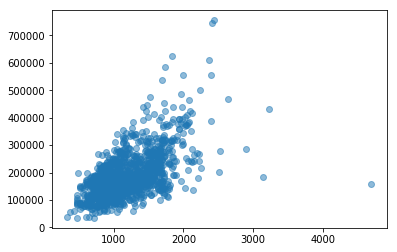

In [31]:
plt.scatter(data['1stFlrSF'],data['SalePrice'],alpha=0.5)
plt.show()

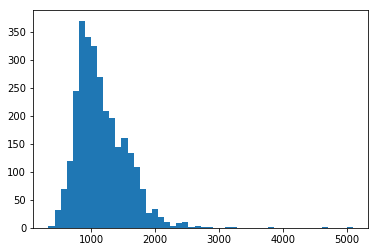

In [45]:
plt.hist(data['1stFlrSF'],bins=50)
plt.show()

In [38]:
data.corr()['1stFlrSF']

1stFlrSF         1.000000
2ndFlrSF        -0.249823
3SsnPorch        0.044086
BedroomAbvGr     0.108418
BsmtFinSF1       0.458092
BsmtFinSF2       0.084330
BsmtFullBath     0.261816
BsmtHalfBath     0.011074
BsmtUnfSF        0.296600
EnclosedPorch   -0.065796
Fireplaces       0.407545
FullBath         0.373077
GarageArea       0.492011
GarageCars       0.440540
GarageYrBlt      0.260450
GrLivArea        0.562538
HalfBath        -0.104141
Id              -0.008678
KitchenAbvGr     0.076071
LotArea          0.332460
LotFrontage      0.458247
LowQualFinSF    -0.012704
MSSubClass      -0.248641
MasVnrArea       0.395834
MiscVal          0.093062
MoSold           0.040143
OpenPorchSF      0.238502
OverallCond     -0.157418
OverallQual      0.479152
PoolArea         0.121900
SalePrice        0.605852
ScreenPorch      0.098381
TotRmsAbvGrd     0.391782
TotalBsmtSF      0.801670
WoodDeckSF       0.227347
YearBuilt        0.310814
YearRemodAdd     0.242245
YrSold          -0.013442
Name: 1stFlr

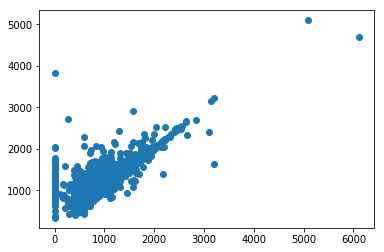

In [39]:
plt.scatter(data['TotalBsmtSF'],data['1stFlrSF'])
plt.show()

In [40]:
data['TotalBsmtSF'].describe()

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

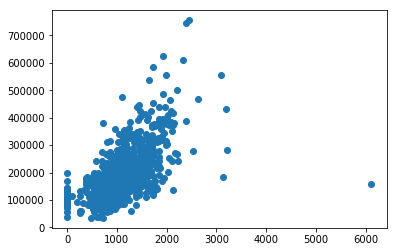

In [41]:
plt.scatter(data['TotalBsmtSF'],data['SalePrice'])
plt.show()

In [43]:
data['1stFlrSFLog']=np.sqrt(data['1stFlrSF'])
data.corr()['1stFlrSFLog']

1stFlrSF         0.991021
2ndFlrSF        -0.259005
3SsnPorch        0.046081
BedroomAbvGr     0.121741
BsmtFinSF1       0.440466
BsmtFinSF2       0.089266
BsmtFullBath     0.263705
BsmtHalfBath     0.011947
BsmtUnfSF        0.304218
EnclosedPorch   -0.067637
Fireplaces       0.406350
FullBath         0.375045
GarageArea       0.494330
GarageCars       0.448546
GarageYrBlt      0.261513
GrLivArea        0.548040
HalfBath        -0.118922
Id              -0.011657
KitchenAbvGr     0.080767
LotArea          0.326029
LotFrontage      0.460218
LowQualFinSF    -0.010068
MSSubClass      -0.267580
MasVnrArea       0.376466
MiscVal          0.062085
MoSold           0.043485
OpenPorchSF      0.228120
OverallCond     -0.159291
OverallQual      0.477052
PoolArea         0.105949
SalePrice        0.604609
ScreenPorch      0.105071
TotRmsAbvGrd     0.389867
TotalBsmtSF      0.792943
WoodDeckSF       0.224641
YearBuilt        0.313980
YearRemodAdd     0.241279
YrSold          -0.015054
1stFlrSFLog 

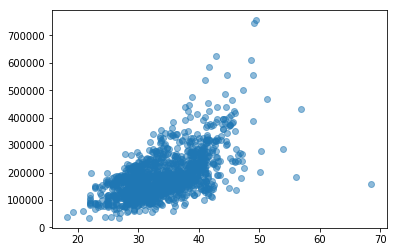

In [44]:
plt.scatter(data['1stFlrSFLog'],data['SalePrice'],alpha=0.5)
plt.show()

In [50]:
data['1stFlrSF'].quantile(0.95)


1830.1

In [51]:
data['1stFlrSF'].clip()

TypeError: unorderable types: str() >= int()